Pierwszy Algorytm: Skalaryzacja przez Funkcję Liniową

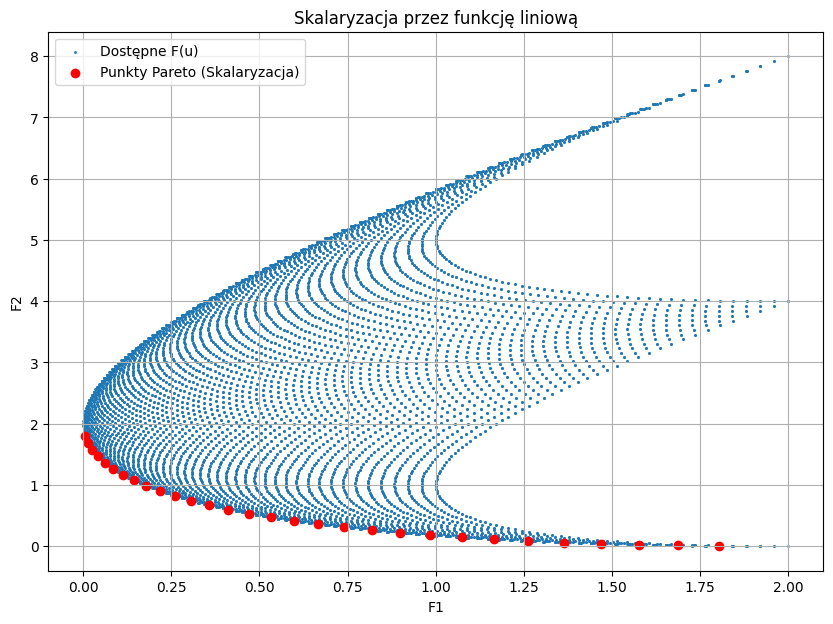

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definiuj funkcje celu
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Skalaryzacja przez funkcję liniową
def scalarization_linear(u0, lambd):
    def scalarized_objective(u):
        return np.dot(lambd, objectives(u))
    bounds = [(-1, 1), (-1, 1)]  # Definiuj dziedzinę U
    result = minimize(scalarized_objective, u0, bounds=bounds)
    return result

# Generuj zakres wartości lambda
lambda_values = np.linspace(0.05, 0.95, 30)
solutions = []

for lambda1 in lambda_values:
    lambd = np.array([lambda1, 1 - lambda1])
    res = scalarization_linear(u0=[0, 0], lambd=lambd)
    solutions.append((res.x, objectives(res.x)))

# Wyodrębnij wartości funkcji celu
F_values = np.array([sol[1] for sol in solutions])

# Wykres
# Generuj przestrzeń funkcji celu
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_grid = np.column_stack([X.ravel(), Y.ravel()])
F_all = np.array([objectives(u) for u in U_grid])

plt.figure(figsize=(10, 7))
plt.scatter(F_all[:, 0], F_all[:, 1], s=1, label='Dostępne F(u)')
plt.scatter(F_values[:, 0], F_values[:, 1], color='red', label='Punkty Pareto (Skalaryzacja)')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Skalaryzacja przez funkcję liniową')
plt.legend()
plt.grid(True)
plt.show()

Drugi Algorytm: Metoda ϵ-ograniczeń

<>:37: SyntaxWarning: invalid escape sequence '\('
<>:40: SyntaxWarning: invalid escape sequence '\('
<>:37: SyntaxWarning: invalid escape sequence '\('
<>:40: SyntaxWarning: invalid escape sequence '\('
C:\Users\Jakub\AppData\Local\Temp\ipykernel_3212\37320443.py:37: SyntaxWarning: invalid escape sequence '\('
  plt.scatter(F_values[:, 0], F_values[:, 1], color='red', label='Punkty Pareto (Metoda \(\epsilon\)-ograniczeń)')
C:\Users\Jakub\AppData\Local\Temp\ipykernel_3212\37320443.py:40: SyntaxWarning: invalid escape sequence '\('
  plt.title('Metoda \(\epsilon\)-ograniczeń')


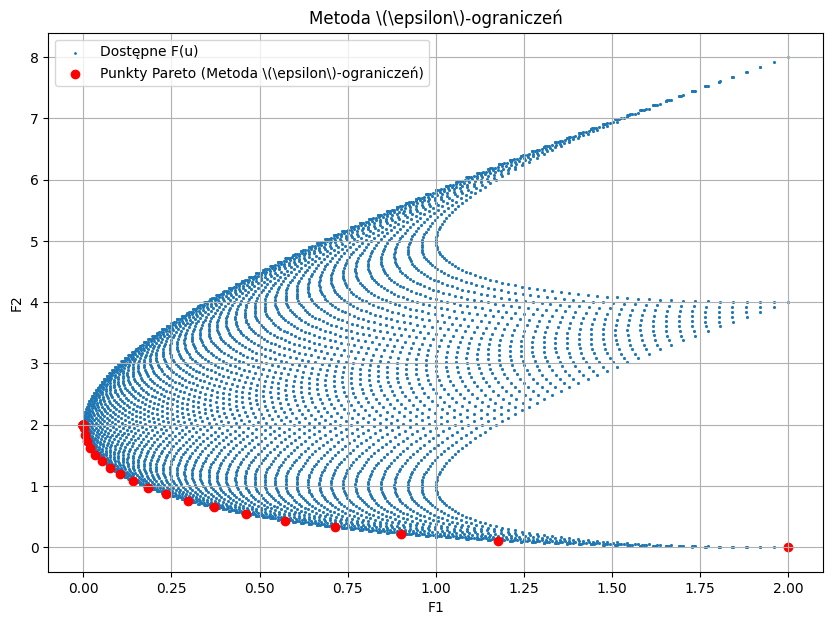

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Funkcje celu (takie same jak wcześniej)
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Optymalizacja metodą \(\epsilon\)-ograniczeń
def epsilon_constraint_optimization(epsilon):
    def objective(u):
        return objectives(u)[0]  # Minimalizuj F1(u)
    def constraint(u):
        return epsilon - objectives(u)[1]  # F2(u) <= epsilon
    bounds = [(-1, 1), (-1, 1)]
    constraints = {'type': 'ineq', 'fun': constraint}
    result = minimize(objective, x0=[0, 0], bounds=bounds, constraints=constraints)
    return result.x, objectives(result.x)

# Generuj zakres wartości epsilon
epsilon_values = np.linspace(min(F_all[:, 1]), max(F_all[:, 1]), 75)
solutions = []

for epsilon in epsilon_values:
    res_u, res_F = epsilon_constraint_optimization(epsilon)
    solutions.append((res_u, res_F))

# Wyodrębnij wartości funkcji celu
F_values = np.array([sol[1] for sol in solutions])

# Wykres
plt.figure(figsize=(10, 7))
plt.scatter(F_all[:, 0], F_all[:, 1], s=1, label='Dostępne F(u)')
plt.scatter(F_values[:, 0], F_values[:, 1], color='red', label='Punkty Pareto (Metoda \(\epsilon\)-ograniczeń)')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Metoda \(\epsilon\)-ograniczeń')
plt.legend()
plt.grid(True)
plt.show()


Trzeci Algorytm: Skalaryzacja przez Odległość od Wybranego Punktu Dominującego

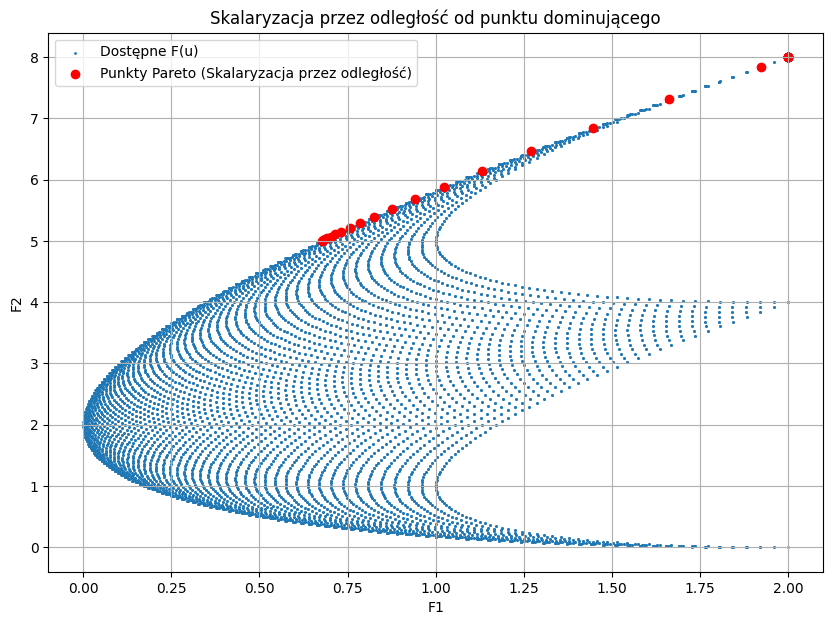

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definiujemy funkcje celu
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Skalaryzacja przez odległość od punktu dominującego z wagami komponentowymi
def scalarization_distance(u0, x_dominating, lambd, p_norm):
    def distance_objective(u):
        diff = objectives(u) - x_dominating
        weighted_diff = lambd * np.abs(diff)
        return np.linalg.norm(weighted_diff, ord=p_norm)
    bounds = [(-1, 1), (-1, 1)]
    result = minimize(distance_objective, u0, bounds=bounds)
    return result

# Generujemy wszystkie dostępne wartości funkcji celu w dziedzinie U
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_grid = np.column_stack([X.ravel(), Y.ravel()])
F_all = np.array([objectives(u) for u in U_grid])

# Wybieramy punkt dominujący (powinien dominować wszystkie F(u))
dominating_point = np.array([5.0, 5.0])  # Upewnij się, że dominuje
p_norm = 2  # Norma euklidesowa

# Generujemy różne wektory wag lambda
lambda_values = np.linspace(0.05, 0.95, 30)  # Unikamy wartości 0 i 1
solutions = []

for lambda1 in lambda_values:
    lambda_vector = np.array([lambda1, 1 - lambda1])
    res = scalarization_distance(u0=[0, 0], x_dominating=dominating_point, lambd=lambda_vector, p_norm=p_norm)
    solutions.append((res.x, objectives(res.x), lambda_vector))

# Wyodrębniamy wartości funkcji celu dla punktów Pareto
F_values = np.array([sol[1] for sol in solutions])

# Wykres
plt.figure(figsize=(10, 7))
plt.scatter(F_all[:, 0], F_all[:, 1], s=1, label='Dostępne F(u)')
plt.scatter(F_values[:, 0], F_values[:, 1], color='red', label='Punkty Pareto (Skalaryzacja przez odległość)')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Skalaryzacja przez odległość od punktu dominującego')
plt.legend()
plt.grid(True)
plt.show()

WYNIKI DLA CHATU:

In [27]:
import numpy as np
from scipy.optimize import minimize

# Definiuj funkcje celu
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Skalaryzacja przez funkcję liniową
def scalarization_linear(u0, lambd):
    def scalarized_objective(u):
        return np.dot(lambd, objectives(u))
    bounds = [(-1, 1), (-1, 1)]  # Dziedzina U
    result = minimize(scalarized_objective, u0, bounds=bounds)
    return result

# Generuj zakres wartości lambda
lambda_values = np.linspace(0.05, 0.95, 10)
solutions_S1 = []

for lambda1 in lambda_values:
    lambd = np.array([lambda1, 1 - lambda1])
    res = scalarization_linear(u0=[0, 0], lambd=lambd)
    solutions_S1.append((res.x, objectives(res.x), lambd))

# Przygotuj dane do analizy
pareto_points_S1 = []
for sol in solutions_S1:
    u_opt, F_u_opt, lambd = sol
    pareto_points_S1.append({
        'u_opt': u_opt.tolist(),
        'F_u_opt': F_u_opt.tolist(),
        'lambda': lambd.tolist()
    })

# Wypisz dane do skopiowania
print("Punkty Pareto dla S1:")
for point in pareto_points_S1:
    print(point)

Punkty Pareto dla S1:
{'u_opt': [0.950000004367318, -0.950000004367318], 'F_u_opt': [1.8050000165958084, 0.004999999126536435], 'lambda': [0.05, 0.95]}
{'u_opt': [0.8500000054978826, -0.8500000054978826], 'F_u_opt': [1.4450000186928007, 0.044999996701270514], 'lambda': [0.15, 0.85]}
{'u_opt': [0.7500000030238105, -0.7500000030238105], 'F_u_opt': [1.1250000090714316, 0.12499999697618948], 'lambda': [0.25, 0.75]}
{'u_opt': [0.6500000069718037, -0.6500000069718037], 'F_u_opt': [0.8450000181266898, 0.2449999902394749], 'lambda': [0.35, 0.65]}
{'u_opt': [0.5500000026314067, -0.5500000026314067], 'F_u_opt': [0.6050000057890947, 0.40499999526346797], 'lambda': [0.44999999999999996, 0.55]}
{'u_opt': [0.4499999923672647, -0.45000000348060826], 'F_u_opt': [0.4049999962630857, 0.60500000456734], 'lambda': [0.5499999999999999, 0.45000000000000007]}
{'u_opt': [0.3499999931349552, -0.3500000042260723], 'F_u_opt': [0.24499999815271933, 0.8450000034306644], 'lambda': [0.65, 0.35]}
{'u_opt': [0.2499999

In [28]:
import numpy as np
from scipy.optimize import minimize

# Funkcje celu (takie same jak wcześniej)
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Optymalizacja metodą \(\epsilon\)-ograniczeń
def epsilon_constraint_optimization(epsilon):
    def objective(u):
        return objectives(u)[0]  # Minimalizuj F1(u)
    def constraint(u):
        return epsilon - objectives(u)[1]  # F2(u) <= epsilon
    bounds = [(-1, 1), (-1, 1)]
    constraints = {'type': 'ineq', 'fun': constraint}
    result = minimize(objective, x0=[0, 0], bounds=bounds, constraints=constraints)
    return result

# Generuj zakres wartości epsilon
epsilon_values = np.linspace(0.5, 5, 10)
solutions_S2 = []

for epsilon in epsilon_values:
    res = epsilon_constraint_optimization(epsilon)
    solutions_S2.append((res.x, objectives(res.x), epsilon))

# Przygotuj dane do analizy
pareto_points_S2 = []
for sol in solutions_S2:
    u_opt, F_u_opt, epsilon = sol
    pareto_points_S2.append({
        'u_opt': u_opt.tolist(),
        'F_u_opt': F_u_opt.tolist(),
        'epsilon': epsilon
    })

# Wypisz dane do skopiowania
print("Punkty Pareto dla S2:")
for point in pareto_points_S2:
    print(point)

Punkty Pareto dla S2:
{'u_opt': [0.4999996769872176, -0.500000322377287], 'F_u_opt': [0.49999999936471284, 0.5000000006357037], 'epsilon': np.float64(0.5)}
{'u_opt': [0.29289322517104216, -0.29289313234322756], 'F_u_opt': [0.1715728283249222, 1.000000113296383], 'epsilon': np.float64(1.0)}
{'u_opt': [0.13397460200307734, -0.1339745903970918], 'F_u_opt': [0.0358983848539515, 1.5000000000536131], 'epsilon': np.float64(1.5)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(2.0)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(2.5)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(3.0)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(3.5)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(4.0)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(4.5)}
{'u_opt': [0.0, 0.0], 'F_u_opt': [0.0, 2.0], 'epsilon': np.float64(5.0)}


In [29]:
import numpy as np
from scipy.optimize import minimize

# Funkcje celu (takie same jak wcześniej)
def objectives(u):
    x, y = u
    f1 = x**2 + y**2
    f2 = (x - 1)**2 + (y + 1)**2
    return np.array([f1, f2])

# Poprawiona funkcja skalaryzacji przez odległość od punktu dominującego
def scalarization_distance(u0, x_dominating, lambd, p_norm):
    def distance_objective(u):
        diff = objectives(u) - x_dominating
        weighted_diff = lambd * np.abs(diff)
        return np.linalg.norm(weighted_diff, ord=p_norm)
    bounds = [(-1, 1), (-1, 1)]
    result = minimize(distance_objective, u0, bounds=bounds)
    return result

# Wybierz punkt dominujący, który dominuje wszystkie możliwe F(u)
dominating_point = np.array([5.0, 5.0])  # Upewnij się, że dominuje
p_norm = 2  # Norma euklidesowa
solutions_S3 = []

# Generuj różne wektory lambda
lambda_values = np.linspace(0.1, 1.0, 10)
for lambda1 in lambda_values:
    lambd = np.array([lambda1, 1 - lambda1])
    res = scalarization_distance(u0=[0, 0], x_dominating=dominating_point, lambd=lambd, p_norm=p_norm)
    solutions_S3.append((res.x, objectives(res.x), lambd))

# Przygotuj dane do analizy
pareto_points_S3 = []
for sol in solutions_S3:
    u_opt, F_u_opt, lambd = sol
    pareto_points_S3.append({
        'u_opt': u_opt.tolist(),
        'F_u_opt': F_u_opt.tolist(),
        'lambda': lambd.tolist()
    })

# Wypisz dane do skopiowania
print("Punkty Pareto dla S3:")
for point in pareto_points_S3:
    print(point)


Punkty Pareto dla S3:
{'u_opt': [-0.5842437163029802, 0.5842437057538699], 'F_u_opt': [0.6826814277525317, 5.019656271866232], 'lambda': [0.1, 0.9]}
{'u_opt': [-0.5968969628721184, 0.5968969495002614], 'F_u_opt': [0.7125719526086767, 5.100159777353436], 'lambda': [0.2, 0.8]}
{'u_opt': [-0.627625771897994, 0.6276257603088232], 'F_u_opt': [0.7878282045537812, 5.298331268967416], 'lambda': [0.30000000000000004, 0.7]}
{'u_opt': [-0.6933597229674797, 0.693359585976206], 'F_u_opt': [0.961495220898636, 5.734933838786007], 'lambda': [0.4, 0.6]}
{'u_opt': [-0.8228756571784449, 0.8228756487111657], 'F_u_opt': [1.3542486804186793, 6.6457512921979], 'lambda': [0.5, 0.5]}
{'u_opt': [-1.0, 1.0], 'F_u_opt': [2.0, 8.0], 'lambda': [0.6, 0.4]}
{'u_opt': [-1.0, 0.9999997351889205], 'F_u_opt': [1.9999994703779111, 7.999998940755752], 'lambda': [0.7000000000000001, 0.29999999999999993]}
{'u_opt': [-1.0, 0.9999994502102809], 'F_u_opt': [1.9999989004208643, 7.999997800841426], 'lambda': [0.8, 0.1999999999999